<a href="https://colab.research.google.com/github/cej34567/AI_STUDY/blob/main/DL/XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

XOR문제는 여러개의 로지스틱 회귀를 사용하여 풀수 있다.

여러개의 HIDDEN LAYER을 갖는다.

**XOR problem**


*   logistic regression
*   neural netwrok



**hidden layer** 도입

y=w1x1+w2x2+b

두개의 직선을 사용해 xor 문제에 접근

In [24]:
import numpy as np

w11=np.array([-2,-2])
w12=np.array([2,2])
w2=np.array([1,1])
b1=3
b2=-1
b3=-1

def MLP(x, w, b):
  y=np.sum(w*x)+b
  #1/1+e^-z중 z만으로 연산하였으므로 아래와 같이 비교
  if y<=0:
    return 0
  else:
    return 1

#NAND 게이트
def NAND(x1,x2):
  return MLP(np.array([x1,x2]), w11, b1)

#or 게이트
def OR(x1, x2):
  return MLP(np.array([x1,x2]), w12, b2)

#and 게이트
def AND(x1, x2):
  return MLP(np.array([x1,x2]), w2, b3)

#XOR 게이트
def XOR(x1, x2):
  return AND(NAND(x1,x2), OR(x1,x2))

#x1, x2 값을 번갈아 대입해 가며 최종값 출력
if __name__=='__main__':
  for x in [(0,0), (1,0), (0,1), (1,1)]:
    y=XOR(x[0], x[1])
    print("입력 값: " + str(x) + '출력 값' + str(y))

입력 값: (0, 0)출력 값0
입력 값: (1, 0)출력 값1
입력 값: (0, 1)출력 값1
입력 값: (1, 1)출력 값0


In [26]:
import numpy as np

w11=np.array([-7.40, -7.40]) #nand
w12=np.array([8.67, 8.67])  #xor
w2=np.array([7.41, 7.41]) #and
b1=11.28
b2=-3.87
b3=-11.29

def MLP(x, w, b):
  #시그모이드 함수 전체를 사용햇으므로 0.5 기준 비교
  y=1/(1+np.exp(-(np.dot(x,w)+b)))
  if y<=0.5:
    return 0
  else:
    return 1

#NAND 게이트
def NAND(x1,x2):
  return MLP(np.array([x1,x2]), w11, b1)

#or 게이트
def OR(x1, x2):
  return MLP(np.array([x1,x2]), w12, b2)

#and 게이트
def AND(x1, x2):
  return MLP(np.array([x1,x2]), w2, b3)

#XOR 게이트
def XOR(x1, x2):
  return AND(NAND(x1,x2), OR(x1,x2))

#x1, x2 값을 번갈아 대입해 가며 최종값 출력
if __name__=='__main__':
  for x in [(0,0), (1,0), (0,1), (1,1)]:
    y=XOR(x[0], x[1])
    print("입력 값: " + str(x) + '출력 값' + str(y))

입력 값: (0, 0)출력 값0
입력 값: (1, 0)출력 값1
입력 값: (0, 1)출력 값1
입력 값: (1, 1)출력 값0


In [31]:
#hidden layer가 2개의 노드
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

lr=0.1
tf.set_random_seed(0)
np.random.seed(0)

x_data=[[0,0],[0,1],[1,0], [1,1]]
y_data=[[0],[1],[1],[0]]

x=tf.placeholder(tf.float32, [None, 2])
y=tf.placeholder(tf.float32, [None, 1])

w1=tf.Variable(tf.random_normal([2,2]), name='weight1')
b1=tf.Variable(tf.random_normal([2]), name='bias1')
layer1=tf.sigmoid(tf.matmul(x, w1)+b1)
w2=tf.Variable(tf.random_normal([2,1]), name='weight2')
b2=tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis=tf.sigmoid(tf.matmul(layer1, w2)+b2)

cost=-tf.reduce_mean(y*tf.log(hypothesis)+(1-y)*tf.log(1-hypothesis))
train=tf.train.GradientDescentOptimizer(lr).minimize(cost)

predicted=tf.cast(hypothesis>0.5, dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  for step in range(10001):
    sess.run(train, feed_dict={x:x_data, y:y_data})
    if step%100==0:
      print(step, sess.run(cost, feed_dict={x:x_data, y:y_data}), sess.run(w2))

  h, c, a=sess.run([hypothesis, predicted, accuracy], feed_dict={x:x_data, y:y_data})
  print('\nhypothesis:\n', h, '\npredict: ', c, '\naccuracy:', a)



0 0.7120535 [[-1.034081  ]
 [-0.24920182]]
100 0.6939178 [[-0.8793111 ]
 [-0.15828331]]
200 0.69353616 [[-0.8739833 ]
 [-0.16133073]]
300 0.69321764 [[-0.8725448 ]
 [-0.16511391]]
400 0.6929381 [[-0.8727991 ]
 [-0.16881435]]
500 0.69268036 [[-0.8743975 ]
 [-0.17265825]]
600 0.69242996 [[-0.87713593]
 [-0.17682958]]
700 0.69217396 [[-0.88091594]
 [-0.18147045]]
800 0.6919 [[-0.88572973]
 [-0.18669322]]
900 0.6915948 [[-0.8916542 ]
 [-0.19258985]]
1000 0.6912445 [[-0.89884603]
 [-0.19923875]]
1100 0.69083244 [[-0.90754527]
 [-0.2067114 ]]
1200 0.69033897 [[-0.9180787]
 [-0.2150775]]
1300 0.6897398 [[-0.93086505]
 [-0.22441044]]
1400 0.68900514 [[-0.9464239]
 [-0.2347941]]
1500 0.68809664 [[-0.9653835 ]
 [-0.24632974]]
1600 0.6869666 [[-0.98848677]
 [-0.25914672]]
1700 0.6855546 [[-1.0165905 ]
 [-0.27341628]]
1800 0.6837851 [[-1.0506585]
 [-0.2893711]]
1900 0.6815644 [[-1.0917372]
 [-0.307331 ]]
2000 0.6787784 [[-1.140917  ]
 [-0.32773805]]
2100 0.6752919 [[-1.1992626 ]
 [-0.35120016]]
22

In [32]:
#hidden layer가 5개의 노드
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

lr=0.1
tf.set_random_seed(0)
np.random.seed(0)

x_data=[[0,0],[0,1],[1,0], [1,1]]
y_data=[[0],[1],[1],[0]]

x=tf.placeholder(tf.float32, [None, 2])
y=tf.placeholder(tf.float32, [None, 1])

w1=tf.Variable(tf.random_normal([2,5]), name='weight1')
b1=tf.Variable(tf.random_normal([5]), name='bias1')
layer1=tf.sigmoid(tf.matmul(x, w1)+b1)
w2=tf.Variable(tf.random_normal([5,1]), name='weight2')
b2=tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis=tf.sigmoid(tf.matmul(layer1, w2)+b2)

cost=-tf.reduce_mean(y*tf.log(hypothesis)+(1-y)*tf.log(1-hypothesis))
train=tf.train.GradientDescentOptimizer(lr).minimize(cost)

predicted=tf.cast(hypothesis>0.5, dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  for step in range(10001):
    sess.run(train, feed_dict={x:x_data, y:y_data})
    if step%100==0:
      print(step, sess.run(cost, feed_dict={x:x_data, y:y_data}), sess.run(w2))

  h, c, a=sess.run([hypothesis, predicted, accuracy], feed_dict={x:x_data, y:y_data})
  print('\nhypothesis:\n', h, '\npredict: ', c, '\naccuracy:', a)

0 0.7494136 [[-1.3654411]
 [ 0.5228874]
 [ 0.2914747]
 [ 0.7999823]
 [-0.7165553]]
100 0.6921745 [[-1.499196  ]
 [ 0.3415482 ]
 [ 0.16000636]
 [ 0.7598956 ]
 [-0.86572146]]
200 0.69178367 [[-1.497696  ]
 [ 0.33024192]
 [ 0.15935487]
 [ 0.779439  ]
 [-0.8649268 ]]
300 0.6913247 [[-1.496628  ]
 [ 0.31978807]
 [ 0.15854558]
 [ 0.80264425]
 [-0.8636689 ]]
400 0.6907699 [[-1.4963543 ]
 [ 0.30960694]
 [ 0.1572676 ]
 [ 0.8300511 ]
 [-0.86217123]]
500 0.6900825 [[-1.4969513]
 [ 0.2994997]
 [ 0.1554892]
 [ 0.8624739]
 [-0.8602938]]
600 0.68921113 [[-1.4985398 ]
 [ 0.289269  ]
 [ 0.15316351]
 [ 0.9009138 ]
 [-0.8578657 ]]
700 0.6880839 [[-1.501307  ]
 [ 0.27871308]
 [ 0.1502274 ]
 [ 0.9465993 ]
 [-0.8546714 ]]
800 0.6865973 [[-1.5055411 ]
 [ 0.26762113]
 [ 0.14660102]
 [ 1.001035  ]
 [-0.8504352 ]]
900 0.6846026 [[-1.5116858 ]
 [ 0.25577077]
 [ 0.1421889 ]
 [ 1.0660508 ]
 [-0.84479964]]
1000 0.68188447 [[-1.5204293 ]
 [ 0.24293125]
 [ 0.13688585]
 [ 1.1438495 ]
 [-0.8373049 ]]
1100 0.67813385 [[

In [46]:
#hidden layer가 4개
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

lr=0.1
tf.set_random_seed(0)
np.random.seed(0)

x_data=[[0,0],[0,1],[1,0],[1,1]]
y_data=[[0],[1],[1],[0]]

x=tf.placeholder(tf.float32, [None, 2])
y=tf.placeholder(tf.float32, [None, 1])

w1=tf.Variable(tf.random_normal([2,5]), name='weight1')
b1=tf.Variable(tf.random_normal([5]), name='bias1')
layer1=tf.sigmoid(tf.matmul(x, w1)+b1)
w2=tf.Variable(tf.random_normal([5,5]), name='weight2')
b2=tf.Variable(tf.random_normal([5]), name='bias2')
layer2=tf.sigmoid(tf.matmul(layer1, w2)+b2)
w3=tf.Variable(tf.random_normal([5,5]), name='weight3')
b3=tf.Variable(tf.random_normal([5]), name='bias3')
layer3=tf.sigmoid(tf.matmul(layer2, w3)+b3)
w4=tf.Variable(tf.random_normal([5,1]), name='weight4')
b4=tf.Variable(tf.random_normal([1]), name='bias4')
hypothesis=tf.sigmoid(tf.matmul(layer3, w4)+b4)

cost=-tf.reduce_mean(y*tf.log(hypothesis)+(1-y)*tf.log(1-hypothesis))
train=tf.train.GradientDescentOptimizer(lr).minimize(cost)

predicted=tf.cast(hypothesis>0.5, dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  for step in range(10001):
    sess.run(train, feed_dict={x:x_data, y:y_data})
    if step%100==0:
      print(step, sess.run(cost, feed_dict={x:x_data, y:y_data}), sess.run(w2))

  h, c, a=sess.run([hypothesis, predicted, accuracy], feed_dict={x:x_data, y:y_data})
  print('\nhypothesis:', h, '\npredicted: ', c, '\naccuracy: ', a)

0 0.70086294 [[ 1.2769952   0.02788171 -1.419434   -0.25117537 -0.02233652]
 [-0.66708374  0.8723593  -0.77672833 -0.21358304 -0.4024588 ]
 [-0.8275342   1.2417879  -0.3962789   0.30199066 -0.13173886]
 [ 0.04495114 -1.6335441  -0.8603076   0.01220216  1.3852489 ]
 [ 1.1245445  -0.43003395 -0.660343   -0.96139693  0.3620631 ]]
100 0.6936465 [[ 1.2851505   0.05110894 -1.414984   -0.2457387  -0.02598095]
 [-0.6792418   0.864884   -0.7888221  -0.20895615 -0.39635432]
 [-0.83219624  1.2427151  -0.40121746  0.29930425 -0.13498536]
 [ 0.05413428 -1.6238667  -0.86078817  0.01544009  1.3886695 ]
 [ 1.1344514  -0.41439417 -0.65719044 -0.9651392   0.35540506]]
200 0.69324243 [[ 1.2946621   0.07210328 -1.4101564  -0.2431204  -0.03079979]
 [-0.69006974  0.8562235  -0.7994514  -0.20750166 -0.39216438]
 [-0.8360247   1.2428027  -0.40544653  0.29465073 -0.13942268]
 [ 0.06507413 -1.6172917  -0.8601135   0.0139786   1.3899689 ]
 [ 1.1462216  -0.40132225 -0.65316635 -0.9728832   0.34692556]]
300 0.6928

In [51]:
#layer10(정확성이 떨어짐) > relu로 해결
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

lr=0.1
tf.set_random_seed(0)
np.random.seed(0)

x_data=[[0,0],[0,1],[1,0],[1,1]]
y_data=[[0],[1],[1],[0]]

x=tf.placeholder(tf.float32, [None, 2])
y=tf.placeholder(tf.float32, [None, 1])

w1=tf.Variable(tf.random_normal([2,5]), name='weight1')
b1=tf.Variable(tf.random_normal([5]), name='bias1')
layer1=tf.sigmoid(tf.matmul(x, w1)+b1)
w2=tf.Variable(tf.random_normal([5,5]), name='weight2')
b2=tf.Variable(tf.random_normal([5]), name='bias2')
layer2=tf.sigmoid(tf.matmul(layer1, w2)+b2)
w3=tf.Variable(tf.random_normal([5,5]), name='weight3')
b3=tf.Variable(tf.random_normal([5]), name='bias3')
layer3=tf.sigmoid(tf.matmul(layer2, w3)+b3)
w4=tf.Variable(tf.random_normal([5,5]), name='weight4')
b4=tf.Variable(tf.random_normal([5]), name='bias4')
layer4=tf.sigmoid(tf.matmul(layer3, w4)+b4)
w5=tf.Variable(tf.random_normal([5,5]), name='weight5')
b5=tf.Variable(tf.random_normal([5]), name='bias5')
layer5=tf.sigmoid(tf.matmul(layer4, w5)+b5)
w6=tf.Variable(tf.random_normal([5,5]), name='weight6')
b6=tf.Variable(tf.random_normal([5]), name='bias6')
layer6=tf.sigmoid(tf.matmul(layer5, w6)+b6)
w7=tf.Variable(tf.random_normal([5,5]), name='weight7')
b7=tf.Variable(tf.random_normal([5]), name='bias7')
layer7=tf.sigmoid(tf.matmul(layer6, w7)+b7)
w8=tf.Variable(tf.random_normal([5,5]), name='weight8')
b8=tf.Variable(tf.random_normal([5]), name='bias8')
layer8=tf.sigmoid(tf.matmul(layer7, w8)+b8)
w9=tf.Variable(tf.random_normal([5,5]), name='weight9')
b9=tf.Variable(tf.random_normal([5]), name='bias9')
layer9=tf.sigmoid(tf.matmul(layer8, w9)+b9)
w10=tf.Variable(tf.random_normal([5,1]), name='weight10')
b10=tf.Variable(tf.random_normal([1]), name='bias10')
hypothesis=tf.sigmoid(tf.matmul(layer9, w10)+b10)

cost=-tf.reduce_mean(y*tf.log(hypothesis)+(1-y)*(1-hypothesis))
train=tf.train.GradientDescentOptimizer(lr).minimize(cost)

predicted=tf.cast(hypothesis>0.5, dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  for step in range(10001):
    sess.run(train, feed_dict={x:x_data, y:y_data})
    if step%100==0:
      print(step, sess.run(cost, feed_dict={x:x_data, y:y_data}), sess.run(w2))

  h, c, a=sess.run([hypothesis, predicted, accuracy], feed_dict={x:x_data, y:y_data})
  print('\hypothesis: ', h, '\npredict: ', c, '\naccuracy : ', a)

0 0.23542276 [[-0.7352246   0.09347306 -1.4756869  -1.3745428   0.45624414]
 [ 0.5457599   0.3372455   0.23428941  1.0910468   0.9836107 ]
 [ 0.30114844 -0.65205204  1.1105293   0.93323153  1.063185  ]
 [ 2.3004231   0.7871982  -0.8097208   1.5030926   0.29663703]
 [-0.34447357 -0.01894814  0.4069023   1.0240418  -0.00265497]]
100 0.01105338 [[-0.735146    0.0934653  -1.4757081  -1.374543    0.4562592 ]
 [ 0.54577243  0.33724484  0.2342862   1.0910468   0.98361236]
 [ 0.30119812 -0.65205723  1.110518    0.93323135  1.0631915 ]
 [ 2.3004613   0.78719497 -0.8097306   1.5030926   0.29664385]
 [-0.34439874 -0.01895642  0.40688404  1.0240418  -0.00264228]]
200 0.0051740445 [[-0.7351293   0.09346332 -1.4757091  -1.374543    0.45626217]
 [ 0.54577243  0.33724484  0.23428601  1.0910468   0.98361236]
 [ 0.30120566 -0.65205723  1.110518    0.93323135  1.0631915 ]
 [ 2.3004613   0.78719497 -0.8097306   1.5030926   0.29664427]
 [-0.3443816  -0.01895882  0.40687993  1.0240418  -0.00263989]]
300 0.0

In [16]:
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
import numpy as np

x_data=np.array([[0,0],[0,1],[1,0],[1,1]], 'float32')
y_data=np.array([[0],[1],[1],[0]], 'float32')

model=Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
model.fit(x_data, y_data, epochs=1000, verbose=2)

print(model.predict(x_data))
print('\n accuracy:%.4f' %(model.evaluate(x_data, y_data)[1]))

Train on 4 samples
Epoch 1/1000
4/4 - 0s - loss: 0.6105 - binary_accuracy: 0.5000
Epoch 2/1000
4/4 - 0s - loss: 0.6101 - binary_accuracy: 0.5000
Epoch 3/1000
4/4 - 0s - loss: 0.6097 - binary_accuracy: 0.5000
Epoch 4/1000
4/4 - 0s - loss: 0.6093 - binary_accuracy: 0.5000
Epoch 5/1000
4/4 - 0s - loss: 0.6088 - binary_accuracy: 0.5000
Epoch 6/1000
4/4 - 0s - loss: 0.6084 - binary_accuracy: 0.5000
Epoch 7/1000
4/4 - 0s - loss: 0.6080 - binary_accuracy: 0.5000
Epoch 8/1000
4/4 - 0s - loss: 0.6075 - binary_accuracy: 0.5000
Epoch 9/1000
4/4 - 0s - loss: 0.6071 - binary_accuracy: 0.5000
Epoch 10/1000
4/4 - 0s - loss: 0.6067 - binary_accuracy: 0.5000
Epoch 11/1000
4/4 - 0s - loss: 0.6063 - binary_accuracy: 0.5000
Epoch 12/1000
4/4 - 0s - loss: 0.6059 - binary_accuracy: 0.5000
Epoch 13/1000
4/4 - 0s - loss: 0.6054 - binary_accuracy: 0.5000
Epoch 14/1000
4/4 - 0s - loss: 0.6050 - binary_accuracy: 0.5000
Epoch 15/1000
4/4 - 0s - loss: 0.6046 - binary_accuracy: 0.7500
Epoch 16/1000
4/4 - 0s - loss:

In [20]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x_data=np.array([[0,0],[0,1],[1,0],[1,1]], 'float32')
y_data=np.array([[0],[1],[1],[0]], 'float32')

model=Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(4, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

opt=optimizers.Adam(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
model.fit(x_data, y_data, epochs=1000, verbose=2)

print(model.predict(x_data))
print('\n accuracy : %.4f' %(model.evaluate(x_data, y_data)[1]))

Train on 4 samples
Epoch 1/1000
4/4 - 0s - loss: 0.8644 - binary_accuracy: 0.5000
Epoch 2/1000
4/4 - 0s - loss: 0.8632 - binary_accuracy: 0.5000
Epoch 3/1000
4/4 - 0s - loss: 0.8621 - binary_accuracy: 0.5000
Epoch 4/1000
4/4 - 0s - loss: 0.8609 - binary_accuracy: 0.5000
Epoch 5/1000
4/4 - 0s - loss: 0.8598 - binary_accuracy: 0.5000
Epoch 6/1000
4/4 - 0s - loss: 0.8586 - binary_accuracy: 0.5000
Epoch 7/1000
4/4 - 0s - loss: 0.8575 - binary_accuracy: 0.5000
Epoch 8/1000
4/4 - 0s - loss: 0.8564 - binary_accuracy: 0.5000
Epoch 9/1000
4/4 - 0s - loss: 0.8552 - binary_accuracy: 0.5000
Epoch 10/1000
4/4 - 0s - loss: 0.8541 - binary_accuracy: 0.5000
Epoch 11/1000
4/4 - 0s - loss: 0.8530 - binary_accuracy: 0.5000
Epoch 12/1000
4/4 - 0s - loss: 0.8519 - binary_accuracy: 0.5000
Epoch 13/1000
4/4 - 0s - loss: 0.8508 - binary_accuracy: 0.5000
Epoch 14/1000
4/4 - 0s - loss: 0.8497 - binary_accuracy: 0.5000
Epoch 15/1000
4/4 - 0s - loss: 0.8487 - binary_accuracy: 0.5000
Epoch 16/1000
4/4 - 0s - loss:

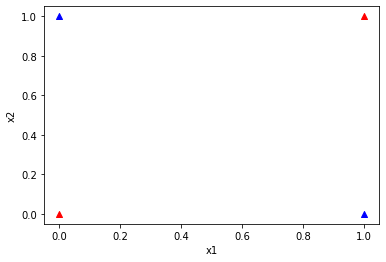

RuntimeError: ignored

In [58]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


tf.random.set_seed(777)

x_data=[[0,0],[0,1], [1,0], [1,1]]
y_data=[[0],[1],[1],[0]]

plt.scatter(x_data[0][0], x_data[0][1], c='red', marker='^')
plt.scatter(x_data[3][0], x_data[3][1], c='red', marker='^')
plt.scatter(x_data[1][0], x_data[1][1], c='blue', marker='^')
plt.scatter(x_data[2][0], x_data[2][1], c='blue', marker='^')

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

dataset=tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))


def preprocess_data(features, labels):      #실제 학습에 쓰일 data 연산을 위해 type을 맞춰준다.
  features=tf.cast(features, tf.float32)
  labels=tf.cast(labels, tf.float32)
  return features, labels

W=tf.Variable(tf.zeros((2,1)), name='weight1')
b=tf.Variable(tf.zeros((1,)), name='bias1')


def logistic_regression(features):
  hypothesis=tf.divide(1., 1.+tf.exp(tf.matmul(features, W)+b))
  return hypothesis

def loss_fn(hyporhesis, labels):
  cost=-tf.reduce_mean(labels * tf.math.log(hypothesis)+(1-labels)*tf.math.log(1-hypothesis))
  return cost

optimizer=tf.keras.optimizers.SGD(learning_rate=0.01)

def accuracy_fn(hypothesis, labels):
  predicted=tf.cast(hypothesis>0.5, dtype=tf.float32)
  accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
  return accuracy

def grad(hypothesis, features, labels):
  with tf.GradientTape() as tape:
    loss_value=loss_fn(neural_net(features), labels)
  return tape.gradient(loss_value, [W,b])

epochs=1001
for step in range(epochs):
  for features, labels in dataset:
    features, labels = preprocess_data(featrues, labels)
    grads=grad(logistic_regression(features), features, labels)
    optimizer.apply_gradients(grads_and_vars=zip(grads, [W1,W2,W3,b1,b2,b3]))
    if step%100==0:
      print('Iter:{}, loss:{:.4f}'.format(step, loss_fn(logistic_regression(features),
                                                        features, labels)))

print('W={}, b={}'.format(W.numpy(), b.numpy()))
x_data, y_data=preprocess_data(x_data, y_data)
test_acc=accuracy_fn(neural_net(x_data), y_data)
print('testset accuracy: {:.4f}'.format(test_acc))

0
0 0.7041219

hypothesis: [[0.5408888 ]
 [0.6005742 ]
 [0.56825864]
 [0.61824524]] 
predicted: [[1.]
 [1.]
 [1.]
 [1.]] 
accuracy: 0.5
[[-1.7958118   0.63301265 -2.3425074   1.0180714 ]
 [ 1.0409757   0.3454366   2.1472988   0.08075304]] [[0.6517622 ]
 [0.28341946]
 [0.11687479]
 [2.0146692 ]] [ 0.5107972 -0.8746126 -1.3382628  0.7263489] [-1.7090153]
100 0.67266136

hypothesis: [[0.4551069 ]
 [0.5597762 ]
 [0.47326913]
 [0.5300696 ]] 
predicted: [[0.]
 [1.]
 [0.]
 [1.]] 
accuracy: 0.5
[[-1.8700709   0.62529534 -2.3862338   1.0227596 ]
 [ 0.9525157   0.32729512  2.1596396   0.22226492]] [[0.53348786]
 [0.18244353]
 [0.4362889 ]
 [1.8853186 ]] [ 0.37467793 -0.87964576 -1.3687989   0.67778003] [-1.888608]
200 0.6566461

hypothesis: [[0.44320464]
 [0.59528804]
 [0.45682257]
 [0.5223403 ]] 
predicted: [[0.]
 [1.]
 [0.]
 [1.]] 
accuracy: 0.5
[[-1.9237989   0.6254005  -2.4750547   1.0895408 ]
 [ 0.8949664   0.31371644  2.189394    0.3625884 ]] [[0.48051468]
 [0.14242686]
 [0.7531115 ]
 [1.8

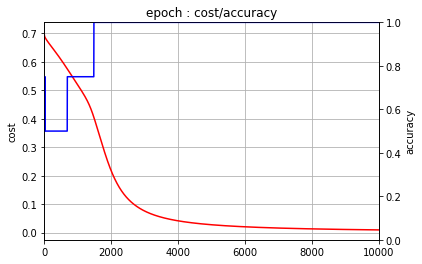

In [11]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

epoch_arr=[]
cost_arr=[]
accuracy_arr=[]

step_val=10000

def graph():
  import matplotlib as mpl
  #mpl.rc('front', family='NanumGothic') #한글 설정
  mpl.rc('axes', unicode_minus=False) #음수부호 설정

  fig, ax0=plt.subplots() #fig는 전체 subplot, 전체 사이즈, ax는 전체중 낱낱개, subplot안의 그래프 개수
  ax1=ax0.twinx() #서로다른 y축을 가진 공통 x축을 사용하여 동일한 플롯에 곡선을 그림
  ax0.set_title('epoch : cost/accuracy')
  ax0.plot(cost_arr, 'r-', label='cost')
  ax0.set_ylabel('cost')
  ax0.grid(True)    #격자 표시
  #ax0.axis([0, step_val, 0, 1])
  
  ax1.plot(accuracy_arr, 'b', label='accuracy')
  ax1.set_ylabel('accuracy')
  ax1.grid(False)
  ax1.set_xlabel('epochs')
  ax1.axis([0, step_val, 0, 1])

  plt.show()

lr=0.1
tf.set_random_seed(0)
np.random.seed(0)

x_data=[[0,0],[0,1],[1,0],[1,1]]
y_data=[[0],[1],[1],[0]]

#placeholder(dtype, shape, name)
x=tf.placeholder(tf.float32, [None, 2]) #선언 후 그 다음 값 전달
y=tf.placeholder(tf.float32, [None, 1])

w1=tf.Variable(tf.random_normal([2,4], name='weight1'))
b1=tf.Variable(tf.random_normal([4]), name='bias1')
layer1=tf.sigmoid(tf.matmul(x, w1)+b1)
w2=tf.Variable(tf.random_normal([4,1], name='weight2'))
b2=tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis=tf.sigmoid(tf.matmul(layer1, w2)+b2)

cost=-tf.reduce_mean(y*tf.log(hypothesis)+(1-y)*tf.log(1-hypothesis))
train=tf.train.GradientDescentOptimizer(lr).minimize(cost)

predicted=tf.cast(hypothesis>0.5, dtype=tf.float32) #텐서를 새로운 형태로 캐스팅 하는데 사용한다.
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  for step in range(step_val):
    sess.run(train, feed_dict={x:x_data, y:y_data})
    if step%(step_val/10)==0:
      print(step)

    if step%100==0:
      print(step, sess.run(cost, feed_dict={x:x_data, y:y_data}))
      h, c, a=sess.run([hypothesis, predicted, accuracy], feed_dict={x:x_data, y:y_data})
      print('\nhypothesis:', h, '\npredicted:',c, '\naccuracy:', a)
      print(sess.run(w1), sess.run(w2), sess.run(b1), sess.run(b2))

    h, a=sess.run([cost, accuracy], feed_dict={x:x_data, y:y_data})
    epoch_arr.append(step)
    cost_arr.append(h)
    accuracy_arr.append(a)

graph()



In [60]:
pip install tensorboard

In [64]:
pip install tensorflow-gpu

     |████████████████████████████████| 394.7MB 38kB/s 
     |████████████████████████████████| 14.5MB 334kB/s 
     |████████████████████████████████| 10.6MB 14.7MB/s 
     |████████████████████████████████| 471kB 51.2MB/s 
     |████████████████████████████████| 3.8MB 37.1MB/s 
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.4 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 2.4.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Found existing installation: grpcio 1.34.0
    Uninstalling grpcio-1.34.0:
      Successfully uninstalled grpcio-

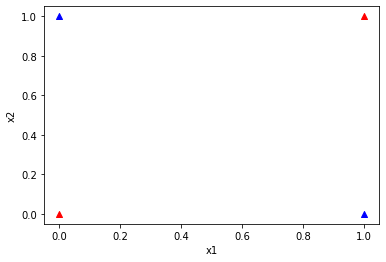

RuntimeError: ignored

In [74]:
#tensorboard
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)

x_data=[[0,0],[0,1],[1,0],[1,1]]
y_data=[[0],[1],[1],[0]]

plt.scatter(x_data[0][0], x_data[0][1], c='red', marker='^')
plt.scatter(x_data[3][0], x_data[3][1], c='red', marker='^')
plt.scatter(x_data[1][0], x_data[1][1], c='blue', marker='^')
plt.scatter(x_data[2][0], x_data[2][1], c='blue', marker='^')

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

data=tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

def preprocess_data(features, labels):
  features=tf.cast(features, tf.float32)
  labels=tf.cast(labels, tf.float32)
  return features, labels

log_path='./logs/xor'
writer=tf.summary.create_file_writer(log_path)

w1=tf.Variable(tf.random.normal([2,10]), name='weight1')
b1=tf.Variable(tf.random.normal([10]), name='bias1')
w2=tf.Variable(tf.random.normal([10,10]), name='weight2')
b2=tf.Variable(tf.random.normal([10]), name='bias2')
w3=tf.Variable(tf.random.normal([10,10]), name='weight3')
b3=tf.Variable(tf.random.normal([10]), name='bias3')
w4=tf.Variable(tf.random.normal([10,1]), name='weight4')
b4=tf.Variable(tf.random.normal([1]), name='bias4')

def neural_net(features, step):
  layer1=tf.sigmoid(tf.matmul(features, w1)+b1)
  layer2=tf.sigmoid(tf.matmul(layer1, w2)+b2)
  layer3=tf.sigmoid(tf.matmul(layer2, w3)+b3)
  hypothesis=tf.sigmoid(tf.matmul(layer3, w4)+b4)

  with writer.as_default():
    tf.summary.histogram('weights1', w1, step=step)
    tf.summary.histogram('biases1', b1, step=step)
    tf.summary.histogram('layer1', layer1, step=step)

    tf.summary.histogram('weights2', w2, step=step)
    tf.summary.histogram('biases2', b2, step=step)
    tf.summary.histogram('layer2', layer2, step=step)

    tf.summary.histogram('weights3', w3, step=step)
    tf.summary.histogram('biases3', b3, step=step)
    tf.summary.histogram('layer3', layer3, step=step)

    tf.summary.histogram('weights4', w4, step=step)
    tf.summary.histogram('biases4', b4, step=step)
    tf.summary.histogram('hypothesis', hypothesis, step=step)

    return hypothesis

def loss_fn(hypothesis, labels):
  cost=-tf.reduce_mean(labels*tf.math.log(hypothesis)+(1-labels)*tf.math.log(1-hypothesis))
  with writer.as_default():
    tf.summary.scalar('loss', cost, step=step)
  return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

def grad(hypothesis, features, labels, step):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features, step),labels)
    return tape.gradient(loss_value, [w1, w2, w3, w4, b1, b2, b3, b4])


EPOCHS = 3000

for step in range(EPOCHS):    
    for features, labels  in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(neural_net(features, step), features, labels, step)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1, W2, W3, W4, b1, b2, b3, b4]))
        if step % 50 == 0:
            loss_value = loss_fn(neural_net(features, step),labels)
            print("Iter: {}, Loss: {:.4f}".format(step, loss_value))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(neural_net(x_data, step),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

